In [12]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['batch_size']= str(2048)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MAPE'
environ['layers'] = '300 200 120 80 30'
environ['dropouts'] = '0.3 0.2 0.2 0.1 0.1'
environ['log'] = 'False'
environ['weight_decay'] = '0.01'
environ['cuda_device'] ='cuda:0'

%run utils.ipynb

In [13]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [8]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


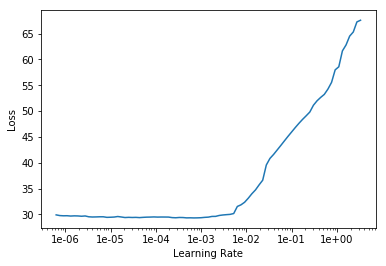

In [9]:
l.recorder.plot()

In [22]:
lr = 1e-05

In [23]:
l.model.train()
l.fit_one_cycle(200, lr)

epoch,train_loss,valid_loss
1,28.308743,32.613266
2,28.211283,32.802532
3,28.213898,32.672298
4,28.147419,32.737469
5,28.220234,32.718533
6,28.200975,32.695965
7,28.202360,32.712070
8,28.199408,32.676914
9,28.204077,32.920261
10,28.149912,32.727757


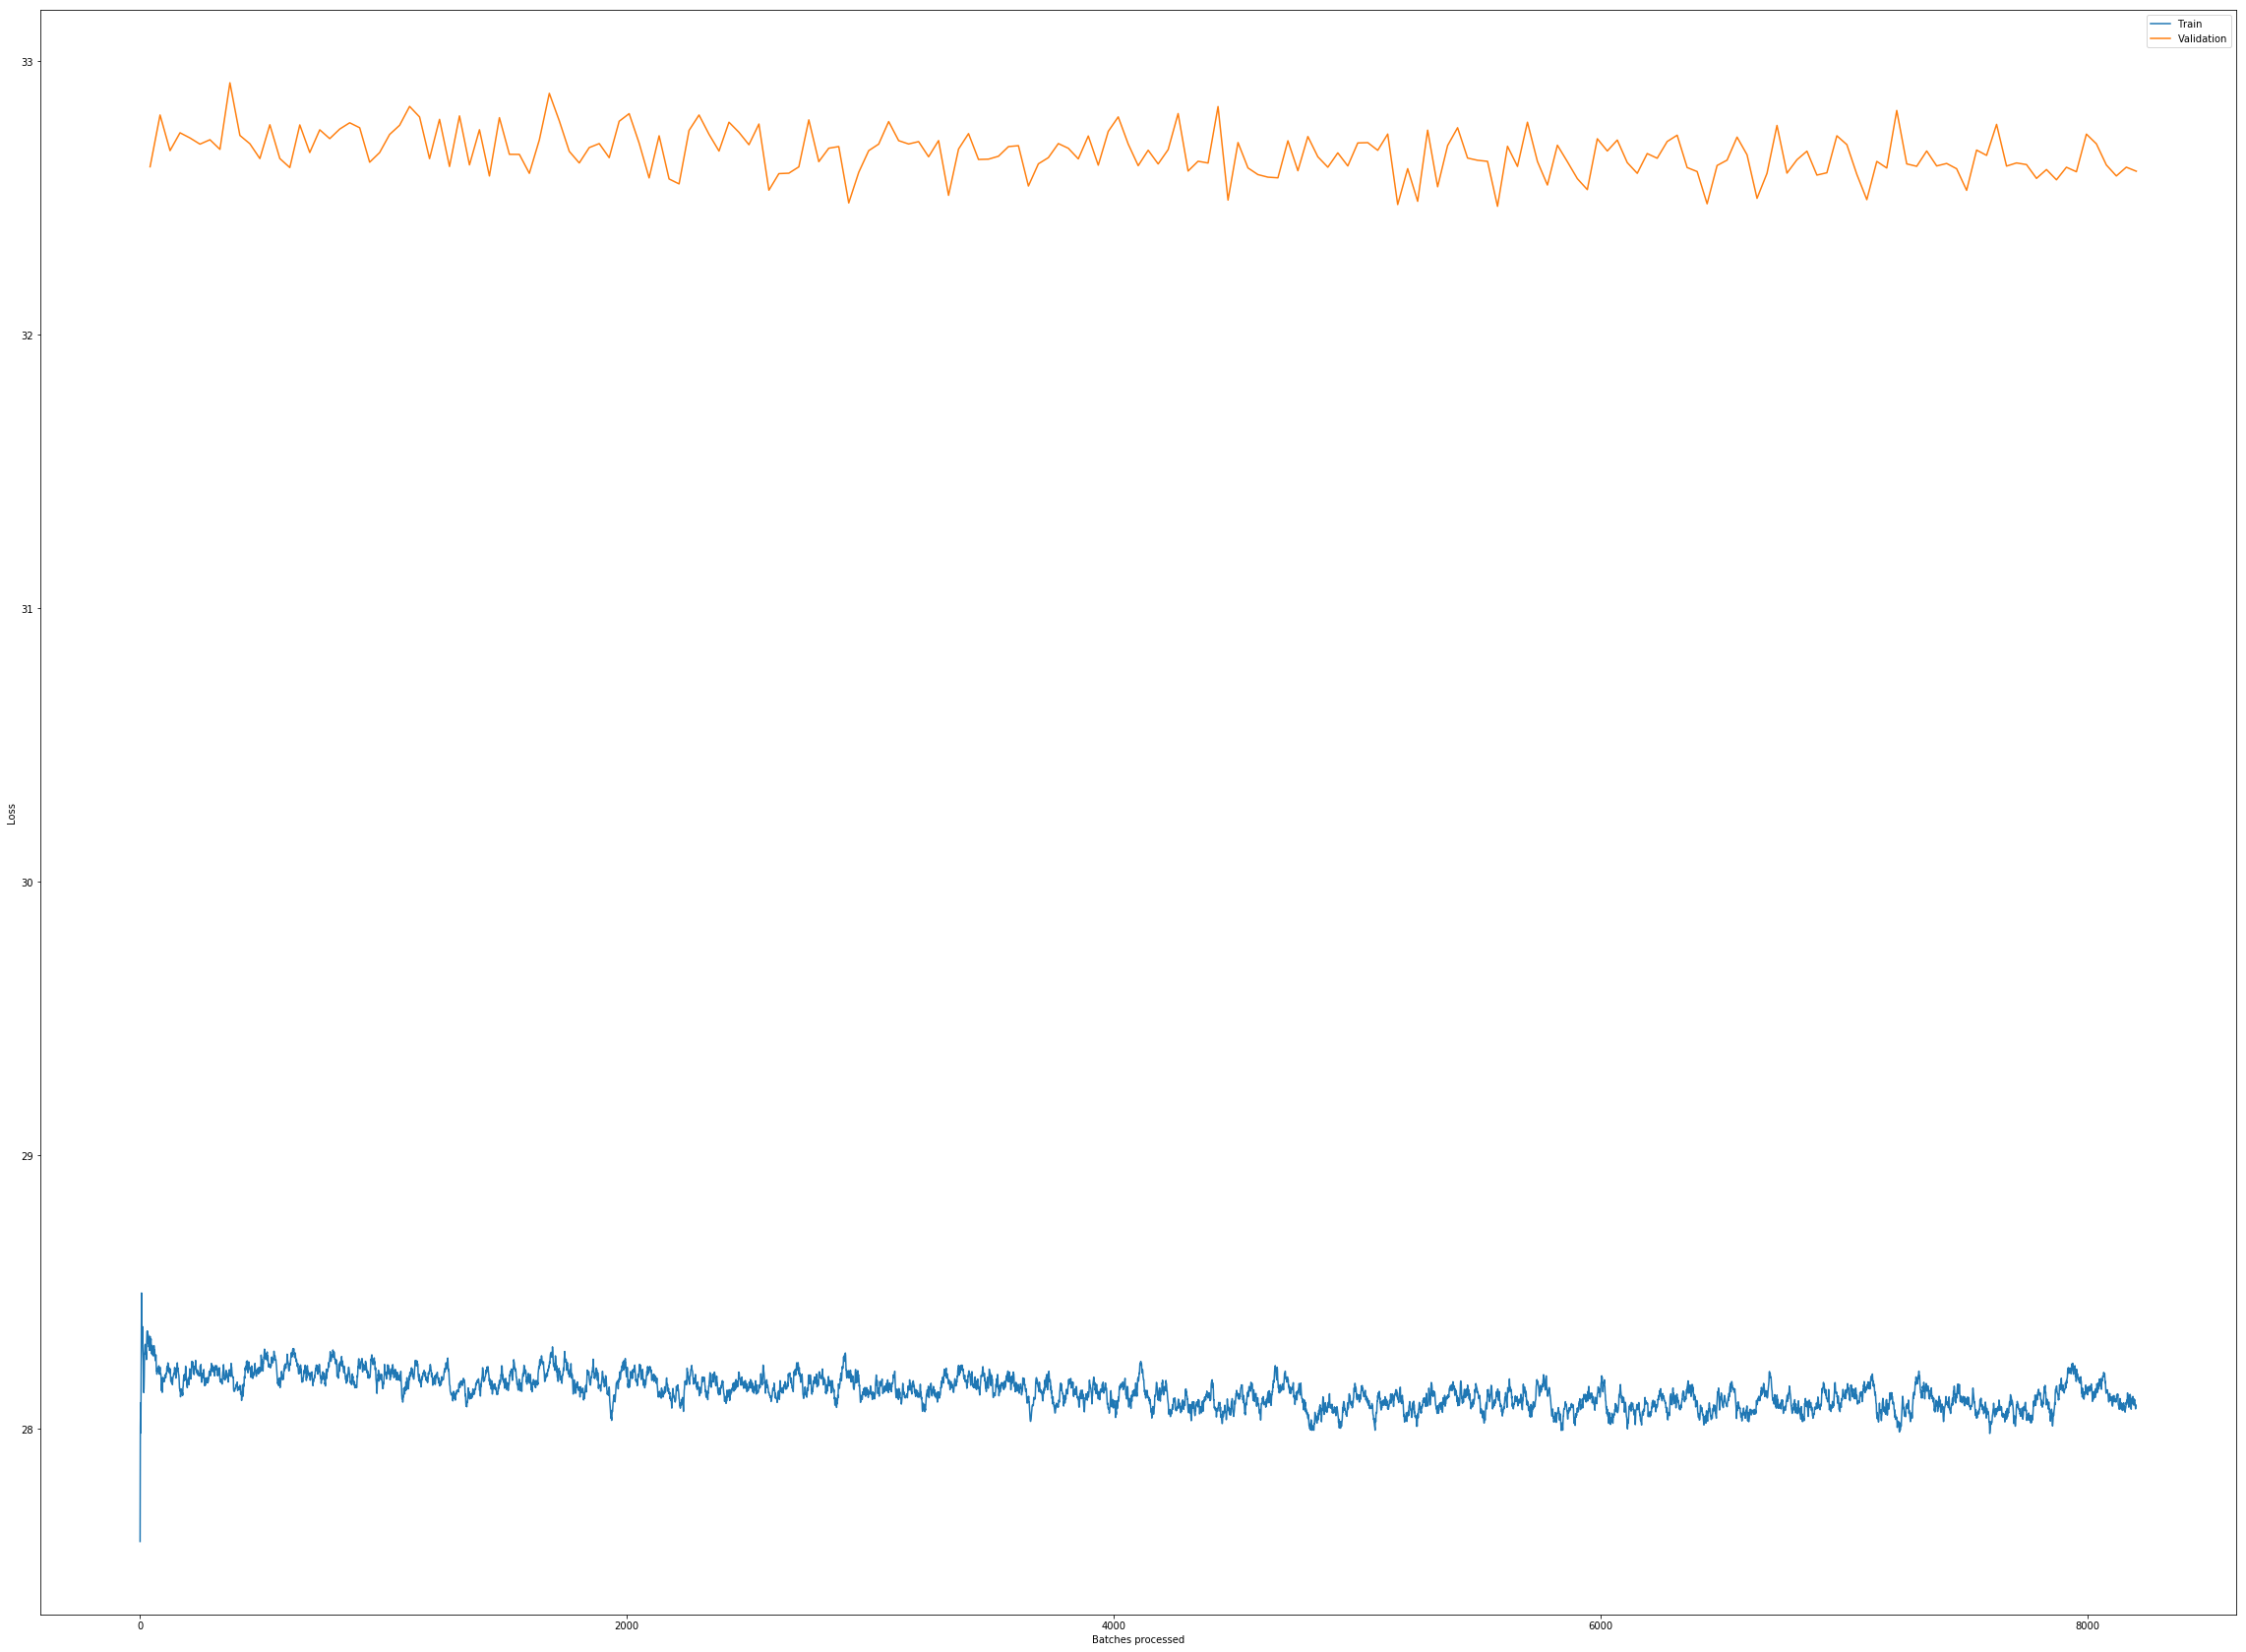

In [24]:
l.recorder.plot_losses()

In [ ]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [25]:
val_df = get_results_df(val_dl, l.model)
train_df = get_results_df(train_dl, l.model)

In [28]:
df = val_df

In [29]:
df[:][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,1.538968,2.000809,6.604605e-01,32.597721
std,1.430050,1.976999,1.107889e+00,31.962505
min,0.045875,0.031768,8.419156e-07,0.000871
25%,0.526562,0.654077,8.571857e-02,10.266953
50%,1.138711,1.387794,2.964435e-01,23.363644
75%,1.948325,2.403782,6.979790e-01,46.624745
max,6.444316,12.500636,1.082629e+01,534.645691


In [17]:
df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,4634.000000,4634.000000,4634.000000,4634.000000
mean,4.592752,5.467480,0.988399,17.515066
std,1.657241,2.195777,1.082530,17.072004
min,0.061757,0.067704,0.000083,0.001791
25%,4.078363,4.479103,0.270361,6.525002
50%,5.225594,5.681032,0.614363,13.428296
75%,5.749725,6.609953,1.320536,22.440917
max,6.685260,13.560771,7.728147,103.807655


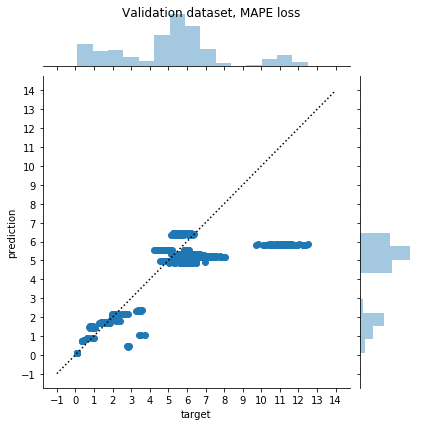

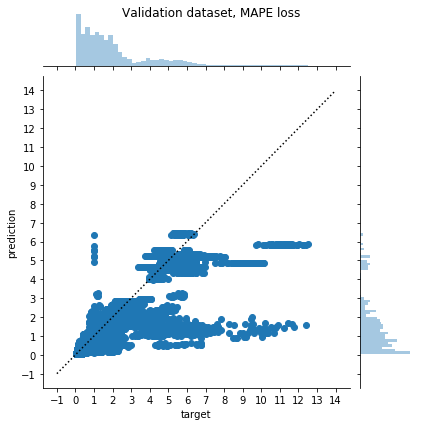

In [30]:
df1 = df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)]
joint_plot(df1, f"Validation dataset, {loss_func} loss")
df2 = df
joint_plot(df2, f"Validation dataset, {loss_func} loss")